<a href="https://colab.research.google.com/github/KqkaricK/Stat/blob/main/Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pandas. Доверительный интервал. Меры различий

In [ ]:
# ваш импорт
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from typing import Callable

1) Загрузка и первичная предобработка

- Загрузить данные **orders.csv** и **visitors.csv** в датафреймы и записать в соответвующие переменные **orders** и **visitors**
- При считывании обоих файлов при помощи read_csv() установите параметр parse_dates=['date'] для перевода даты из типа str в Timestamp
- Удалить пересечения по клиентам (visitorId) в группе A и B (код можно взять из лекции, таблицу visitors не трогать в этом случае!) и записать результат в переменную **orders**

ВСЕ ПРИМЕРЫ ЕСТЬ В ЛЕКЦИИ

In [ ]:
# ваш код
orders = pd.read_csv('orders.csv', parse_dates=['date'])
visitors = pd.read_csv('visitors.csv', parse_dates=['date'])

In [ ]:
# ваш код
unique_A = orders[orders['group'] == 'A']['visitorId'].unique()
unique_B = orders[orders['group'] == 'B']['visitorId'].unique()
len(np.intersect1d(unique_A, unique_B))
orders = orders[~orders['visitorId'].isin(np.intersect1d(unique_A, unique_B))]
orders

,transactionId,visitorId,date,revenue,group
0,0,0,2021-03-15,1633,B
1,1,1,2021-03-15,659,B
3,3,3,2021-03-15,9688,B
4,4,4,2021-03-15,2221,B
5,5,5,2021-03-15,2148,B
...,...,...,...,...,...
1191,1191,1191,2021-03-14,16419,B
1192,1192,1192,2021-03-14,6478,B
1193,1193,1193,2021-03-14,3185,A
1194,1194,1194,2021-03-14,10514,A


2) Создать новую таблицу **orders_group**, произведя группировку таблицы **orders** по полям 'date', 'group' и подсчитав:
- кол-во уникальных транзакций
- кол-во уникальных клиентов
- сумму прибыли revenue

Далее объединить получившийся датасет после группировки с таблицей **visitors** по полям 'date' и 'group' и записать в переменную **orders_group**

ВСЕ ПРИМЕРЫ ЕСТЬ В ЛЕКЦИИ

In [ ]:
# ваш код
orders_group = orders.groupby(['date', 'group']).agg({
    'transactionId': 'nunique',
    'visitorId': 'nunique',
    'revenue': 'sum'
}).reset_index()
orders_group = pd.merge(orders_group, visitors, on=['date', 'group'])
orders_group

,date,group,transactionId,visitorId,revenue,visitors
0,2021-03-01,A,23,19,141459,682
1,2021-03-01,B,17,17,59242,631
2,2021-03-02,A,19,18,90960,564
3,2021-03-02,B,23,22,161192,560
4,2021-03-03,A,24,24,111486,410
...,...,...,...,...,...,...
57,2021-03-29,B,15,15,105283,487
58,2021-03-30,A,9,8,77786,413
59,2021-03-30,B,21,21,208365,412
60,2021-03-31,A,8,8,53067,692


3) Создайте новую колонку **purchase_mean** в таблице **orders_group** - средний чек, разделив сумму дохода на кол-во уникальных транзакци (пример в лекции)

In [ ]:
# ваш код
orders_group['purchase_mean'] = orders_group['revenue'] / orders_group['transactionId']
orders_group

,date,group,transactionId,visitorId,revenue,visitors,purchase_mean
0,2021-03-01,A,23,19,141459,682,6150.391304
1,2021-03-01,B,17,17,59242,631,3484.823529
2,2021-03-02,A,19,18,90960,564,4787.368421
3,2021-03-02,B,23,22,161192,560,7008.347826
4,2021-03-03,A,24,24,111486,410,4645.250000
...,...,...,...,...,...,...,...
57,2021-03-29,B,15,15,105283,487,7018.866667
58,2021-03-30,A,9,8,77786,413,8642.888889
59,2021-03-30,B,21,21,208365,412,9922.142857
60,2021-03-31,A,8,8,53067,692,6633.375000


4) Создайте две переменные **orders_group_a** и **orders_group_b**, куда запишите данные группы А и группы B соответственно (пример в лекции)

In [ ]:
# ваш код
orders_group_a = orders_group[orders_group['group'] == 'A']
orders_group_b = orders_group[orders_group['group'] == 'B']

print("orders_group_a:")
print(orders_group_a)
print("orders_group_b:")
print(orders_group_b)

orders_group_a:
         date group  transactionId  visitorId  revenue  visitors  \
0  2021-03-01     A             23         19   141459       682   
2  2021-03-02     A             19         18    90960       564   
4  2021-03-03     A             24         24   111486       410   
6  2021-03-04     A             11         11    40689       709   
8  2021-03-05     A             22         22    85292       764   
10 2021-03-06     A             15         12    40361       680   
12 2021-03-07     A             16         16   122754       566   
14 2021-03-08     A             14         14    88035       547   
16 2021-03-09     A             11         11   133730       595   
18 2021-03-10     A             15         15   151539       406   
20 2021-03-11     A             11         11    60153       662   
22 2021-03-12     A             19         19   219681       569   
24 2021-03-13     A             14         14   263098       713   
26 2021-03-14     A             

5) Построить графики распределений (histplot) среднего чека отдельно для A и B групп.

Отобразить графики **в ОДНОЙ строке, но в РАЗНЫХ столбцах и с РАЗНЫМИ цветами**

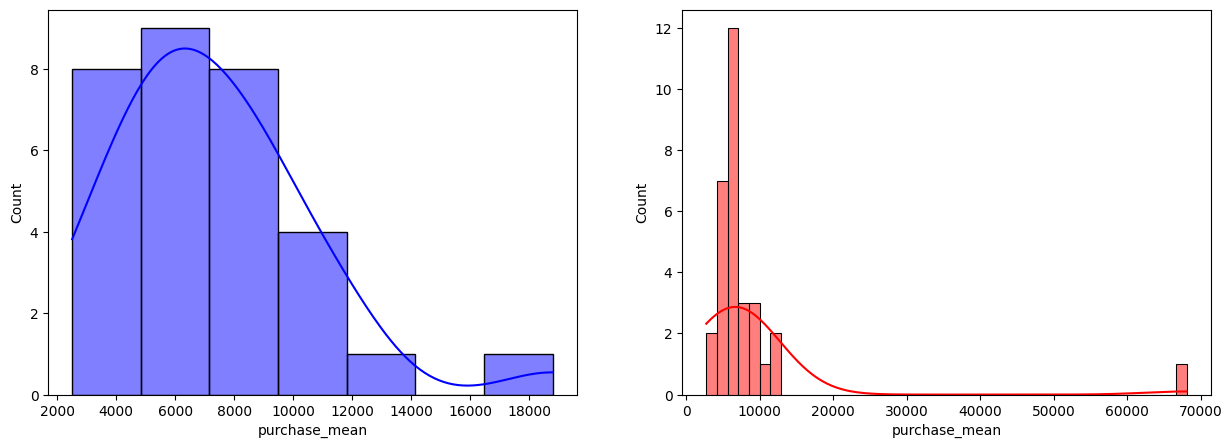

In [ ]:
# ваш код
fig, axes = plt.subplots(ncols=2, figsize=(15, 5))

sns.histplot(data=orders_group_a,
             x='purchase_mean',
             color='blue',
             kde=True,
             ax=axes[0])
sns.histplot(data=orders_group_b,
             x='purchase_mean',
             color='red',
             kde=True,
             ax=axes[1])
plt.show()

6) Проверка на нормальность:

- Напишите функцию **check_normal()** для проверки на нормальность по критерию Шапиро-Уилка, которая будет выводить **относится ли распределение к нормальному или не**т, а также **выводить значение p-value с 3мя знаками после запятой**

- Проверьте распределения среднего чека (признак purchase_mean) **для группы A** на нормальность, используя написанную функцию
- Проверьте распределения среднего чека (признак purchase_mean) **для группы B** на нормальность, используя написанную функцию

In [ ]:
# ваш код
def check_normal(data):
    p_value = stats.shapiro(data).pvalue
    if p_value >= 0.05:
        result = "распределение нормальное"
    else:
        result = "распределение не нормальное"
    print(result)
    print(f"P-value: {p_value:.3f}")

print("Проверка для группы A:")
check_normal(orders_group_a['purchase_mean'])
print("\nПроверка для группы B:")
check_normal(orders_group_b['purchase_mean'])


Проверка для группы A:
распределение не нормальное
P-value: 0.017

Проверка для группы B:
распределение не нормальное
P-value: 0.000


7) Напишите функцию **get_interval()** (пока без применения), которая бы:

- вычисляла доверительный интервал **при помощи z критерия** при известной дисперсии (использовать дисперсию при вычислении, которую будете подавать на вход функции)
- вычисляла доверительный интервал **при помощи t-критерия**, если дисперсия неизвестна
- выводила как и сам интервал, так и условие: известна дисперсия, либо не известна
- также нужно учесть, что функция должна принимать на вход:
    - данные
    - дисперсию (при известной дисперсии) - по умолчанию = None
    - уровень доверия, по умолчанию $\beta=0.95$ **здесь аккуратнее!!** см в лекции почему
    
У вас должна получиться **ОДНА функция**, которая вычисляет интервал для разных случаев

In [ ]:
# ваш код
def get_interval(data,
                 variance=None,
                 confidence=0.95):

    mean = np.mean(data)
    std_dev = np.std(data)
    n = len(data)

    if variance is not None:
        z_score = stats.norm.ppf((1 + confidence) / 2)
        margin_error = z_score * np.sqrt(variance / n)
        lower_bound = mean - margin_error
        upper_bound = mean + margin_error
        print("Условие: известна дисперсия")
        print("Доверительный интервал (по z-критерию, известна дисперсия): [{:.3f}, {:.3f}]".format(lower_bound, upper_bound))
    else:
        t_score = stats.t.ppf((1 + confidence) / 2, n - 1)
        margin_error = t_score * std_dev / np.sqrt(n)
        lower_bound = mean - margin_error
        upper_bound = mean + margin_error
        print("Условие: не известна дисперсия")
        print("Доверительный интервал (по t-критерию, не известна дисперсия): [{:.3f}, {:.3f}]".format(lower_bound, upper_bound))

8) Найти доверительные интервалы **для каждой из групп A и B по отдельности** при помощи написанной функции **get_interval()** из задания №7 для признака **purchase_mean** при уровне доверия $\beta=0.99$!!!:
   - при известной дисперсии

- За известную дисперсию возьмите значение для группы A = 11088900
- За известную дисперсию возьмите значение для группы B = 122102500


**Будьте внимательны**, так как в лекции брали пример с 95%, то с каждой стороны мы брали по 2.5%

In [ ]:
# ваш код
print("Доверительный интервал для группы A:")
get_interval(orders_group_a['purchase_mean'],
             11088900,
             0.99)
print("\nДоверительный интервал для группы B:")
get_interval(orders_group_b['purchase_mean'],
             122102500,
             0.99)


Доверительный интервал для группы A:
Условие: известна дисперсия
Доверительный интервал (по z-критерию, известна дисперсия): [5725.041, 8806.174]

Доверительный интервал для группы B:
Условие: известна дисперсия
Доверительный интервал (по z-критерию, известна дисперсия): [3641.223, 13865.403]


9) Найти доверительные интервалы **для каждой из групп A и B по отдельности** при помощи написанной функции **get_interval()** из задания №7 для признака **purchase_mean** для $\beta=0.99$!!!:
   - при неизвестной дисперсии
   
**Будьте внимательны**, так как в лекции брали пример с 95%, то с каждой стороны мы брали по 2.5%

In [ ]:
# ваш код
print("Доверительный интервал для группы A:")
get_interval(orders_group_a['purchase_mean'],
             confidence=0.99)
print("\nДоверительный интервал для группы B:")
get_interval(orders_group_b['purchase_mean'],
             confidence=0.99)

Доверительный интервал для группы A:
Условие: не известна дисперсия
Доверительный интервал (по t-критерию, не известна дисперсия): [5622.179, 8909.036]

Доверительный интервал для группы B:
Условие: не известна дисперсия
Доверительный интервал (по t-критерию, не известна дисперсия): [3301.333, 14205.293]


10) Написать функцию **bootstrap_interval()** (пока без применения) для вычисления интервала как из задания №7, но теперь только с использованием **Bootstrap**

- функция должна принимать:
    - данные
    - функцию для усреднения (среднее, медиана и тд), по умолчанию np.mean
    - уровень доверия, по умолчанию $\beta=0.95$
- вам уже дана функция из лекции bootstrap_resample(), вы ее можете **вызывать вннутри** bootstrap_interval() для генерации выборок
- необходимо, чтобы функция **возвращала доверительный интервал**

**ВАЖНО:**
Описывать внутри вашей функции функцию bootstrap_resample() НЕ НУЖНО!

In [ ]:
def bootstrap_resample(data: pd.Series,
                       function: Callable,
                       count_generate: int = 1000,
                       random_state: int = 10) -> list:
    """
    Bootstrap
    """
    sample_size = len(data)
    np.random.seed(random_state)
    bootstrap_sample = []

    for i in range(count_generate):
        # replace - параметр возвращения
        sample = data.sample(sample_size, replace=True)
        bootstrap_sample.append(function(sample))

    return bootstrap_sample

In [ ]:
# ваш код
def bootstrap_interval(data,
                       function=np.mean,
                       confidence=0.95):

    bootstrap_sample = bootstrap_resample(data,
                                          function)
    alpha = (1 - confidence) / 2
    lower_quantile = np.percentile(bootstrap_sample, alpha * 100)
    upper_quantile = np.percentile(bootstrap_sample, (1 - alpha) * 100)

    return lower_quantile, upper_quantile

11) Найти доверительный интервал **для каждой из групп A и B отдельно** для признака **purchase_mean** при помощи написанной функции из задания №10 при уровне доверия $\beta=0.99$

In [ ]:
# ваш код
print("Доверительный интервал для группы A:")
interval_a = bootstrap_interval(orders_group_a['purchase_mean'],
                                confidence=0.99)
print(interval_a)
print("\nДоверительный интервал для группы B:")
interval_b = bootstrap_interval(orders_group_b['purchase_mean'],
                                confidence=0.99)
print(interval_b)


Доверительный интервал для группы A:
(5947.664514351122, 8954.742452421211)

Доверительный интервал для группы B:
(6050.459675169871, 16430.998963675273)


12) Выберите **ТОЛЬКО ОДИН** из статистических методов (t-критерий или Манна-Уитни) для **сравнения средних двух выборок** (группы A с группой B) по признаку **purchase_mean** согласно проведенным выше исследованиям с **учетом типа распределения обеих выборок и их размера**.

Схожи ли будут выборки? Взять уровень значимости $\alpha=0.05$

In [ ]:
# ваш код
t_statistic, p_value = stats.ttest_ind(orders_group_a['purchase_mean'], orders_group_b['purchase_mean'])

print("Значение t-статистики:", t_statistic)
print("Значение p-value:", p_value)

if p_value < 0.05:
    print("Отвергаем нулевую гипотезу: средние значения различны")
else:
    print("Не отвергаем нулевую гипотезу: средние значения схожи")

Значение t-статистики: -0.7067879725286915
Значение p-value: 0.4824341946463935
Не отвергаем нулевую гипотезу: средние значения схожи


13) Проделайте то же самое сравнение, но уже при помощи **Bootstrap**:
- Используйте функцию **bootstrap_compare()** из лекции
- В качестве **function возьмите np.median**!!!

Выведите график **РАСПРЕДЕЛЕНИЯ** (не частоты значений) разности двух групп (пример в лекции), а также доверительный интервал

Схожи ли результаты эксеримента?

Средние схожи, p-value=0.9247529552447145
Доверительный интервал: (-1525.5051759834378, 1774.4603174603171)


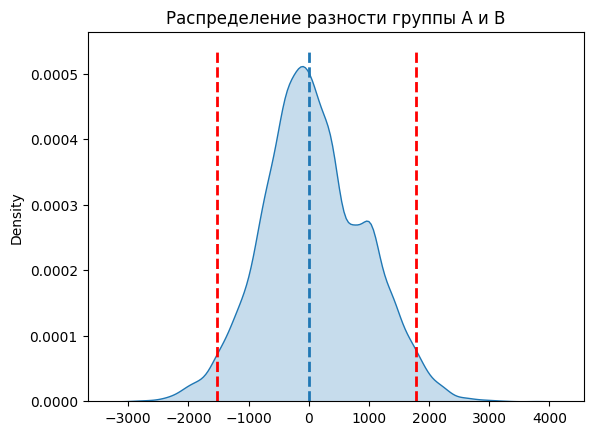

In [ ]:
# ваш код
def check_pvalue(pvalue: float) -> None:
    """
    Вывод результата по значению p_value
    """
    try:
        if pvalue >= 0.05:
            print(f'Средние схожи, p-value={pvalue}')
        else:
            print(f'Средние различны, p-value={pvalue}')
    except TypeError as ex:
        print(f'message: {ex}')

def bootstrap_compare(data1: pd.Series,
                      data2: pd.Series,
                      function: Callable,
                      alpha: float = 0.05,
                      count_generate: int = 9999,
                      random_state: int = 42) -> tuple:
    """
    Сравнение выборок при помощи Bootstrap
    """
    np.random.seed(random_state)
    sample_size = max(len(data1), len(data2))
    diff_sample = []

    for i in range(count_generate):
        sample1 = data1.sample(sample_size, replace=True).values
        sample2 = data2.sample(sample_size, replace=True).values

        diff = function(sample1 - sample2)
        diff_sample.append(diff)

    # нижний и верхние квантили
    low = alpha / 2
    high = 1 - alpha / 2

    # интервал
    ci = (np.quantile(diff_sample, low), np.quantile(diff_sample, high))

    # p-value
    # Кумулятивная функция распределения (CDF) распределения вероятностей
    # содержит вероятности того, что случайная величина X меньше или равна X
    # 0 - в том случае, если разницы нет, среднее должно быть в нуле
    p1 = stats.norm.cdf(0, loc=np.mean(diff_sample), scale=np.std(diff_sample))
    p2 = 1 - p1
    p_value = min(p1, p2) * 2
    check_pvalue(p_value)

    return diff_sample, ci, p_value

diff_sample, ci, p_value = bootstrap_compare(orders_group_a['purchase_mean'],
                                             orders_group_b['purchase_mean'],
                                             function=np.median)
print("Доверительный интервал:", ci)

plt.title('Распределение разности группы А и B')
sns.kdeplot(diff_sample, fill=True)

_, max_ylim = plt.ylim()
plt.vlines(ci,
           color='red',
           ymin=0,
           ymax=max_ylim,
           linestyle='--',
           linewidth=2)
plt.vlines(0,
           ymin=0,
           ymax=max_ylim,
           linestyle='--',
           linewidth=2)
plt.show()